In [5]:
# Import the required modules
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Import the datasets to be analysed
mouse = pd.read_csv(r'C:\Users\abued\git\MatplotlibHomework\matplotlib-challenge\Pymaceuticals\mouse_drug_data.csv')
trial = pd.read_csv(r'C:\Users\abued\git\MatplotlibHomework\matplotlib-challenge\Pymaceuticals\clinicaltrial_data.csv')


# Merge datasets on mouse ID to have DRUG column on each.
combined_df = pd.merge(mouse, trial, how="left", on="Mouse ID")

combined_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [7]:
# Objective is to analyze the data to show how four treatments (Capomulin, 
# Infubinol, Ketapril, and Placebo) compare. Therefore, isolate these 
# treatments for analysis:
df = combined_df.set_index("Drug").loc[['Capomulin', 'Infubinol', 'Ketapril',
                          'Placebo']]

In [8]:
# Creating a scatter plot that shows how the tumor volume changes over time for 
# each treatment.

cap = df.loc['Capomulin'][['Tumor Volume (mm3)', 'Timepoint']]
inf = df.loc['Infubinol'][['Tumor Volume (mm3)', 'Timepoint']]
ket = df.loc['Ketapril'][['Tumor Volume (mm3)', 'Timepoint']]
pla = df.loc['Placebo'][['Tumor Volume (mm3)', 'Timepoint']]


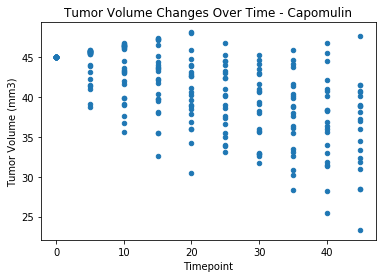

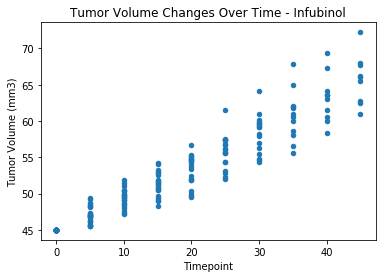

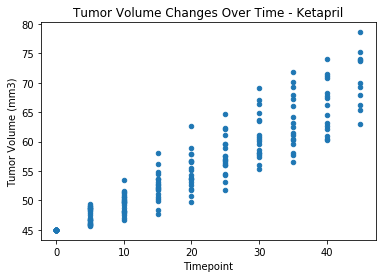

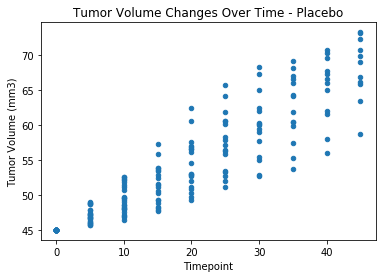

In [9]:
# Scatter plot for individual treatment, showing how the tumor volume changes 
# over time
cap.plot(kind='scatter', x='Timepoint', y='Tumor Volume (mm3)')
plt.title('Tumor Volume Changes Over Time - Capomulin')
inf.plot(kind='scatter', x='Timepoint', y='Tumor Volume (mm3)')
plt.title('Tumor Volume Changes Over Time - Infubinol')
ket.plot(kind='scatter', x='Timepoint', y='Tumor Volume (mm3)')
plt.title('Tumor Volume Changes Over Time - Ketapril')
pla.plot(kind='scatter', x='Timepoint', y='Tumor Volume (mm3)')
plt.title('Tumor Volume Changes Over Time - Placebo')
plt.show()

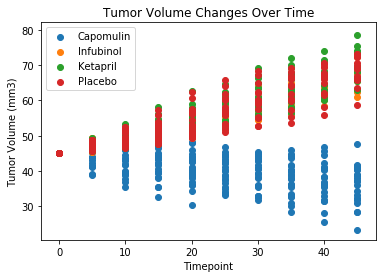

In [10]:
# Scatter plot showing how the tumor volume changes over time for all treatments:
plt.scatter(cap['Timepoint'], cap['Tumor Volume (mm3)'], label='Capomulin')
plt.scatter(inf['Timepoint'], inf['Tumor Volume (mm3)'], label='Infubinol')
plt.scatter(ket['Timepoint'], ket['Tumor Volume (mm3)'], label='Ketapril')
plt.scatter(pla['Timepoint'], pla['Tumor Volume (mm3)'], label='Placebo')
plt.legend()
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume Changes Over Time')
plt.show()

In [11]:
# Creating a scatter plot that shows how the number of metastatic sites changes 
# over time for each treatment.
# Group the dataset by the treatments and timepoint, and compute standard error 
# of the mean of groups as a proxy to measure how the number of metastatic 
# sites changes over time for each treatment. 
dd = combined_df.groupby(['Drug','Timepoint']).sem()
pd.DataFrame(dd).reset_index(level = None, inplace = True)                              # Transform the grouped data to a dataframe
dh = dd.pivot(index ="Timepoint", columns = 'Drug', values = "Metastatic Sites")        # Pivot the dataframe, set the index to timepoint
dh.reset_index(level = None, inplace = True)                                            # Reset the dataframe index


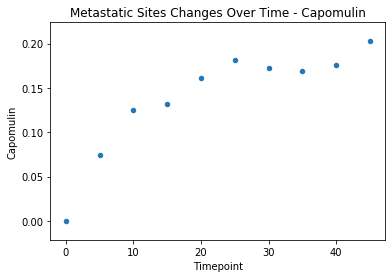

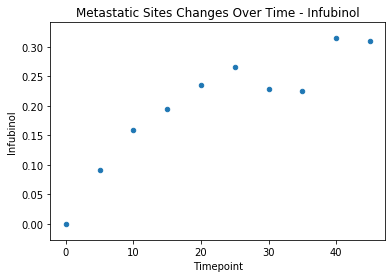

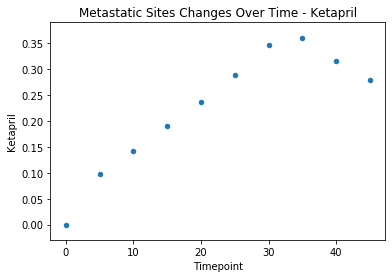

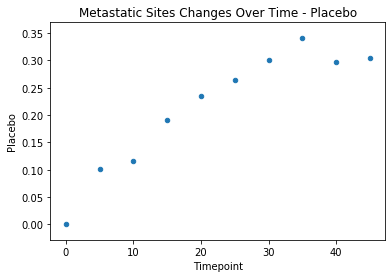

In [12]:
#dh[['Timepoint','Capomulin','Infubinol','Ketapril','Placebo']]

# Scatter plot for metastatic sites changes over time for each treatment.
dh.plot(kind='scatter', x='Timepoint', y='Capomulin')
plt.title('Metastatic Sites Changes Over Time - Capomulin')
dh.plot(kind='scatter', x='Timepoint', y='Infubinol')
plt.title('Metastatic Sites Changes Over Time - Infubinol')
dh.plot(kind='scatter', x='Timepoint', y='Ketapril')
plt.title('Metastatic Sites Changes Over Time - Ketapril')
dh.plot(kind='scatter', x='Timepoint', y='Placebo')
plt.title('Metastatic Sites Changes Over Time - Placebo')
plt.show()

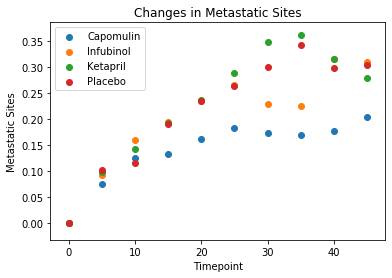

In [13]:
# Scatter plot for metastatic sites changes over time for all treatment 
plt.scatter(dh['Timepoint'], dh['Capomulin'], label='Capomulin')
plt.scatter(dh['Timepoint'], dh['Infubinol'], label='Infubinol')
plt.scatter(dh['Timepoint'], dh['Ketapril'], label='Ketapril')
plt.scatter(dh['Timepoint'], dh['Placebo'], label='Placebo')
plt.legend()
plt.xlabel('Timepoint')
plt.ylabel('Metastatic Sites')
plt.title('Changes in Metastatic Sites')
plt.show()

In [14]:
# Creating a scatter plot that shows the number of mice still alive through the 
# course of treatment (Survival Rate)
# Group the dataset by the treatments and timepoint, and count the dataset items 
# This gives the total number of mice for each treatment and different timepoint
mice = combined_df.groupby(["Drug","Timepoint"]).count()

mice_df = pd.DataFrame(mice["Mouse ID"])                                                # Transform the grouped data to a dataframe
mice_df.reset_index(inplace=True)                                                       # Reset the dataframe index


In [15]:
# Reformat dataframe by pivoting the dataframe, setting the index to timepoint
p_mice = mice_df.pivot(index ="Timepoint", columns = 'Drug', values = "Mouse ID")
p_mice.reset_index(level = None, inplace = True)


In [16]:
# Isolate the treatments required for analysis:
kk = pd.DataFrame(p_mice[['Timepoint','Capomulin','Infubinol','Ketapril','Placebo']])


In [20]:
# Isolate the treatments required for analysis:
kk = pd.DataFrame(p_mice[['Timepoint','Capomulin','Infubinol','Ketapril','Placebo']])


In [21]:
# To calculate the survival rate, divide the mice count for each timepoint by 
# the mice count for the initial timepoint, timepoint 0, for each treatment:
def divide(x):
    return kk[x]/kk[x].iloc[0] * 100

In [22]:
hh = [divide(x) for x in kk.iloc[:,1:5]]
#gg = pd.concat([hh[0], hh[1], hh[2], hh[3]], axis=1)
# Add the calculated rate to the existing mice dataframe, creating new columns
# for the survival rate of each treatment:
kk['Capomulin%'] = hh[0]
kk['Infubinol%'] = hh[1]
kk['Ketapril%'] = hh[2]
kk['Placebo%'] = hh[3]


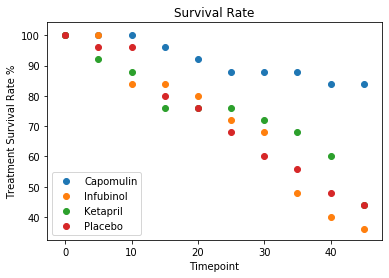

In [23]:
# Scatter plot for Mice Surviving Rate 
plt.scatter(kk['Timepoint'], kk['Capomulin%'], label='Capomulin')
plt.scatter(kk['Timepoint'], kk['Infubinol%'], label='Infubinol')
plt.scatter(kk['Timepoint'], kk['Ketapril%'], label='Ketapril')
plt.scatter(kk['Timepoint'], kk['Placebo%'], label='Placebo')
plt.legend()
plt.xlabel('Timepoint')
plt.ylabel('Treatment Survival Rate %')
plt.title('Survival Rate')
plt.show()